<a href="https://colab.research.google.com/github/Eriol1052000/UNICORN-COMPANIES/blob/main/Exemplar_Structure_your_data_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNICORN COMPANIES**

**Phan Minh Quang - Practise 1**

The aim of this project is to help investors decide which companies to invest in next, the firm wants insights into unicorn companies–companies that are valued at over one billion dollars.


**Data Dictionary**

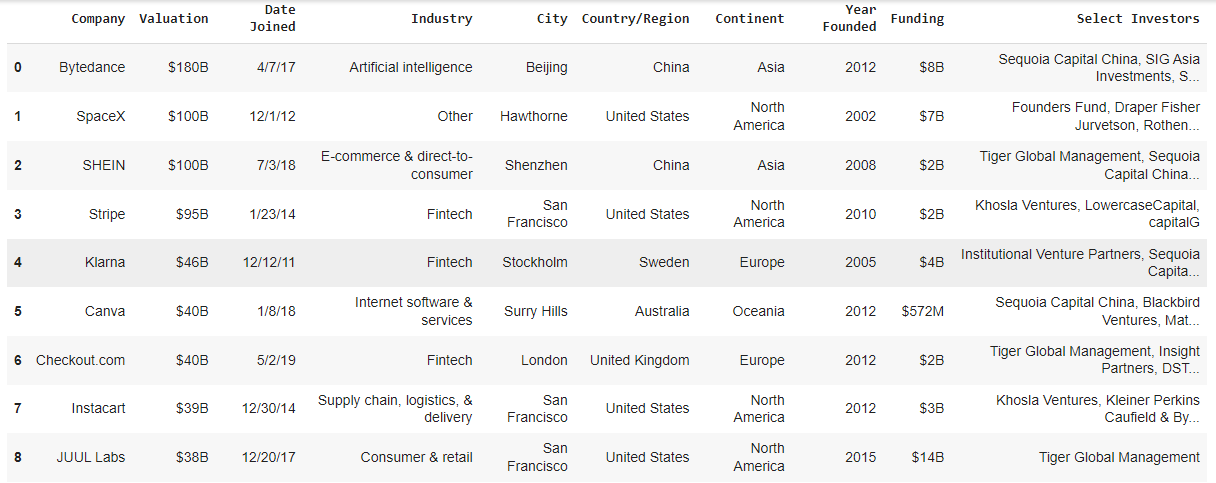

In [ ]:
# Import the relevant Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the datasets
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Google Advanced Data Analytics Professional Certificate/Dataset/1.Go Beyond the Numbers Translate Data into Insights/Week1/home/jovyan/work"

In [ ]:
companies = pd.read_csv('drive/My Drive/Google Advanced Data Analytics Professional Certificate/Dataset/1.Go Beyond the Numbers Translate Data into Insights/Week1/home/jovyan/work/Unicorn_Companies.csv')
companies.head(10)

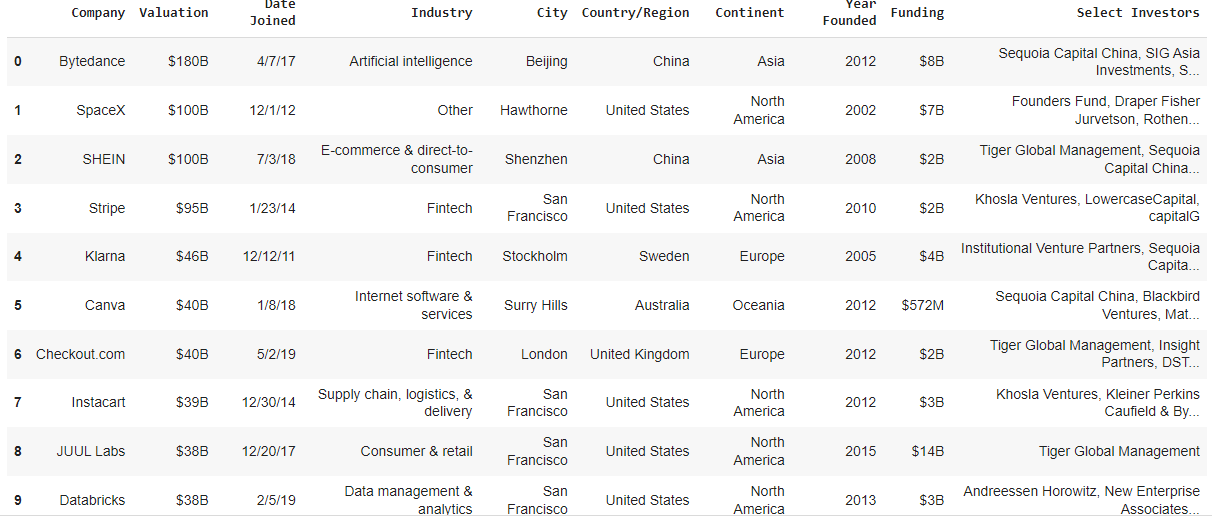

In [ ]:
# Identify the number of rows and columns in the dataset.
companies.shape

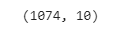

In [ ]:
# Check for duplicates.
companies.drop_duplicates().shape

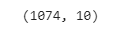

In [ ]:
# Display the data types of the columns.
companies.dtypes

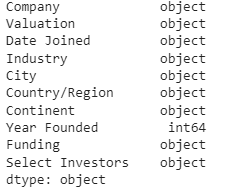

In [ ]:
# To arrange the data from latest to earliest `Year Founded`
companies.sort_values(by="Year Founded",ascending=False).head(10)

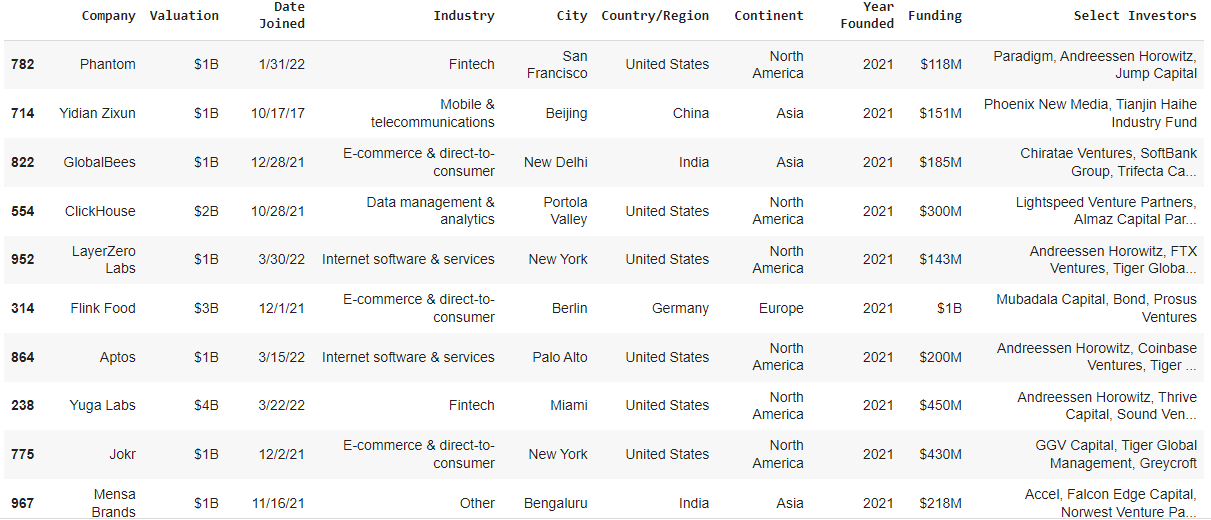

In [ ]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.
companies["Year Founded"].value_counts().sort_values(ascending=False).head()

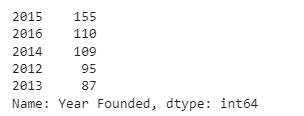

In [ ]:
sns.histplot(data=companies,x='Year Founded')
plt.title('Year Founded histogram');

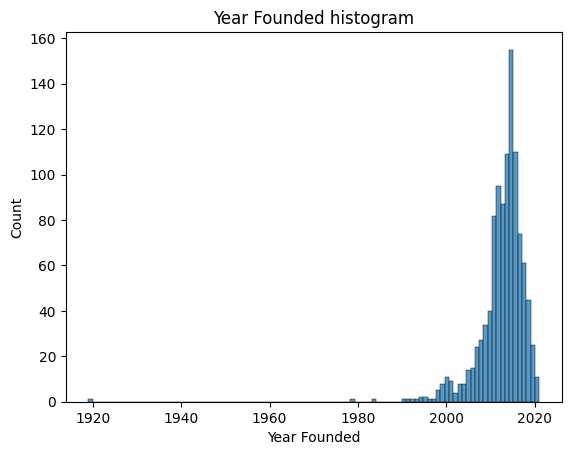

In [ ]:
# Convert Convert the Date Joined column to datetime. This will split each value into year, month, and date components,
# allowing you to later gain insights about when a company gained unicorn status with respect to each component.
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.dtypes

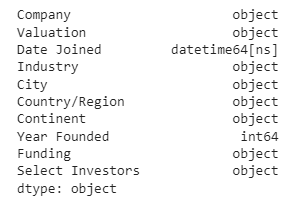

In [ ]:
# Create Month Joined and Years To Join
companies['Month Joined'] = companies['Date Joined'].dt.month_name()
companies["Years To Join"] = companies['Date Joined'].dt.year - companies['Year Founded']
print(companies['Month Joined'])
print(companies["Years To Join"])

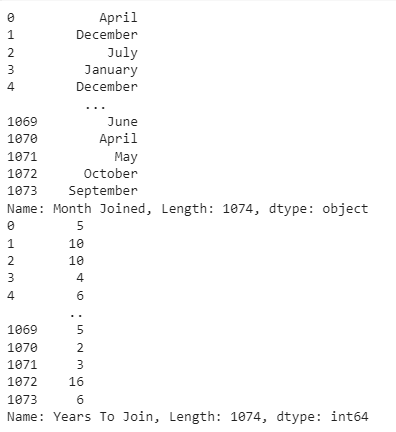

In [ ]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable .
companies_2021 = companies[companies['Date Joined'].dt.year == 2021]
companies_2021.head()

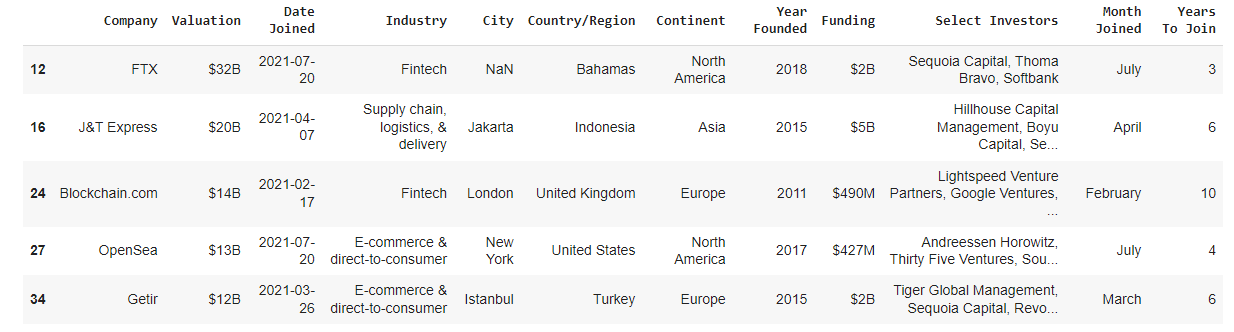

In [ ]:
# Insert a `Week Joined` column into `companies_2021.`
companies_2021.insert(3,'Week Joined',companies['Date Joined'].dt.strftime('%Y-W%V'),allow_duplicates=True)
companies_2021.head()

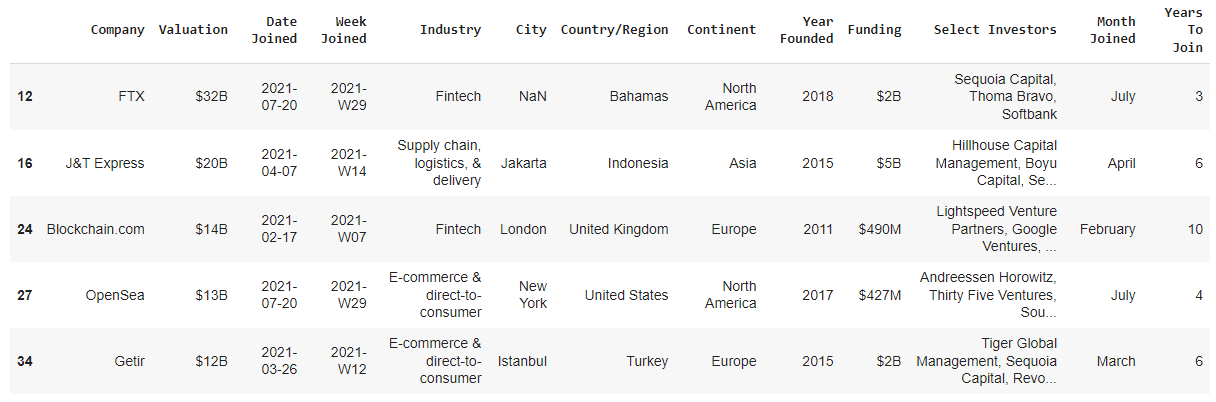

In [ ]:
# Group `companies_2021` by `Week Joined`.
# Aggregate by counting companies that joined per week of 2021.
# Save the resulting DataFrame in a new variable.
companies_by_week_2021 = companies_2021.groupby(by='Week Joined')["Company"].count().reset_index().rename(columns={"Company":"Company Count"})
companies_by_week_2021.head()

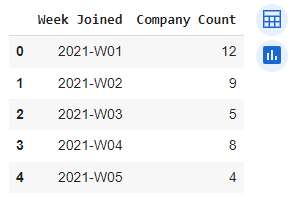

In [ ]:
# Filter by the additional year to create a subset that consists of companies that joined in that year.
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `companies_2020_2021` by `Quarter Joined`,
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the first few rows of the new DataFrame to confirm that it was created.

### YOUR CODE HERE ###

companies_by_quarter_2020_2021.head()

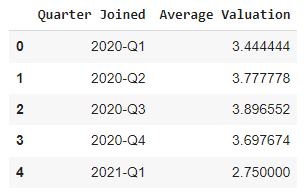

In [ ]:
# Define a list that contains months in chronological order.
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November",
               "December"]

In [ ]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.
sns.boxplot(x=companies['Month Joined'],
            y=companies['Years To Join'],
            order=month_order,
            showfliers=False)
plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

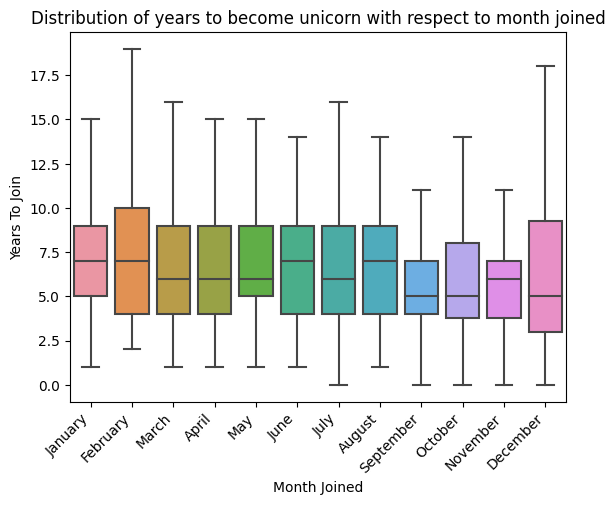

In [ ]:
# Create bar plot to visualize the average number of years it took companies to reach unicorn status
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.
plt.figure(figsize=(10,11))
sns.barplot(x=companies['Year Founded'],y=companies['Years To Join'],ci=False)
plt.title("Bar plot of years to join with respect to year founded")
plt.xlabel("Year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

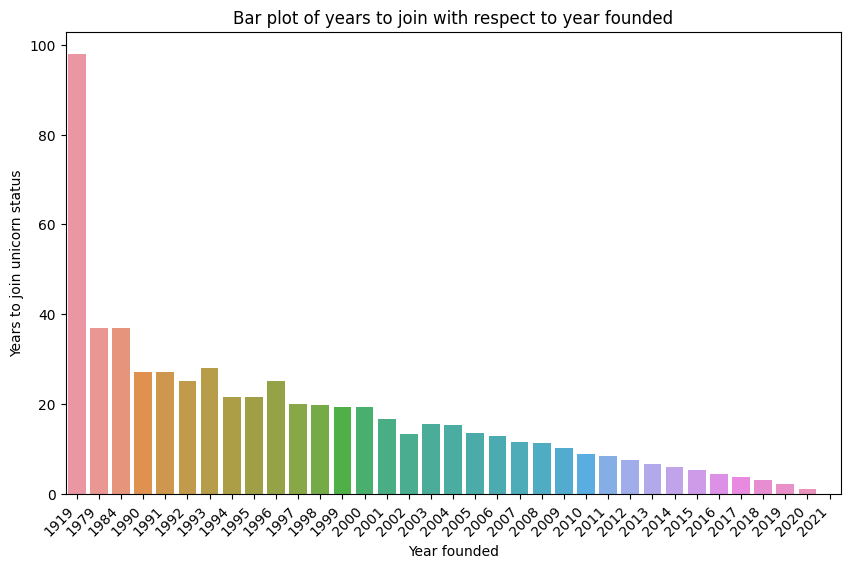

In [ ]:
# Create bar plot to visualize number of companies that joined per interval for the year of interest.
plt.figure(figsize = (20, 5))
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of companies")
plt.title("Number of companies that became unicorns per week in 2021")
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)
plt.show()

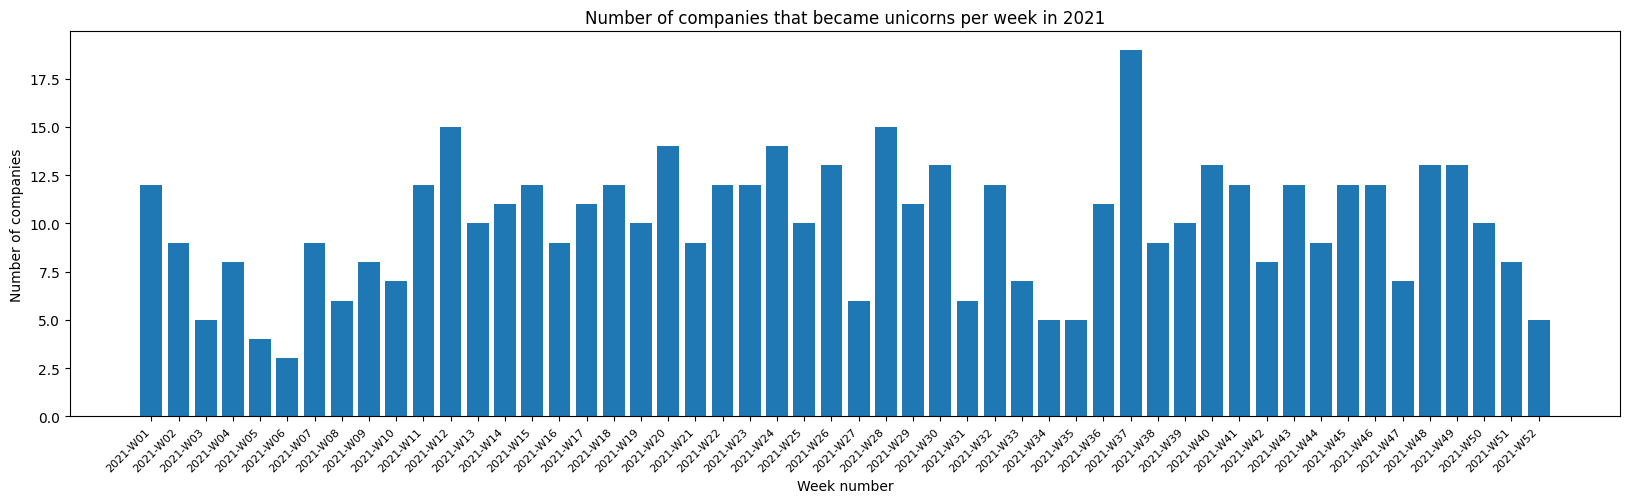

In [ ]:
# Using slicing, extract the year component and the time interval that you specified,
# and save them by adding two new columns into the subset.
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.

plt.figure(figsize = (10, 5))
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()

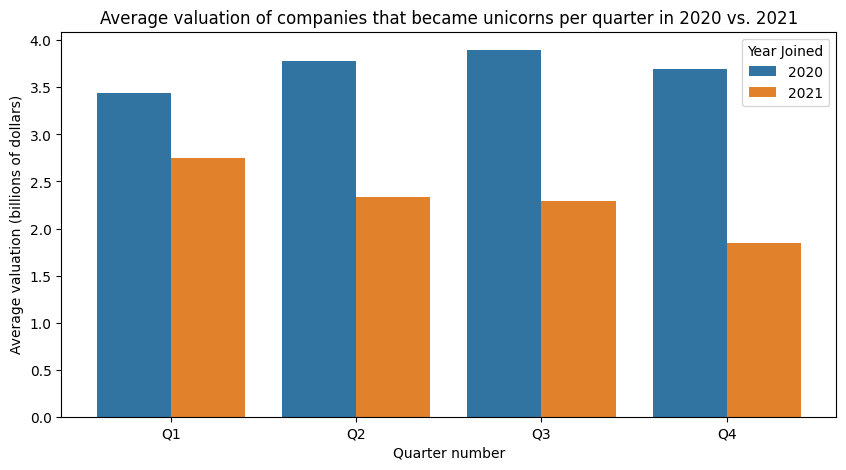

# **CONCLUSION**

There are 1074 unicorn companies represented in this dataset.
2015 is the year when the most number of unicorn companies were founded.
Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries.
The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.
One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.
What recommendations would you share with stakeholders based on these findings?

According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.
Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year.
The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders.